In [1]:
# run options
num_images = 500
device = "cuda"
quantizations = ["none", "skip_vision_tower", "full"]


In [2]:
for quantization in quantizations:
    print(f"Running Quantization-Mode: {quantization}")
    !uv run main.py -q {quantization} -n {num_images} -d {device} --save-captions

Running Quantization-Mode: none


⠙ Preparing packages... (0/6)                                                   
⠙ Preparing packages... (0/6)--------------     0 B/1.37 MiB            
⠙ Preparing packages... (0/6)-------------- 14.94 KiB/1.37 MiB          
⠙ Preparing packages... (0/6)-------------- 14.94 KiB/1.37 MiB          
pyparsing            ------------------------------     0 B/111.22 KiB
⠙ Preparing packages... (0/6)-------------- 14.94 KiB/1.37 MiB          
pyparsing            ------------------------------ 14.91 KiB/111.22 KiB
⠙ Preparing packages... (0/6)-------------- 14.94 KiB/1.37 MiB          
pyparsing            ------------------------------ 14.91 KiB/111.22 KiB
⠙ Preparing packages... (0/6)-------------- 14.94 KiB/1.37 MiB          
pyparsing            ------------------------------ 14.91 KiB/111.22 KiB
⠙ Preparing packages... (0/6)-------------- 14.94 KiB/1.37 MiB          
pyparsing            ------------------------------ 14.91 KiB/111.22 KiB
contourpy            ------------------------

In [3]:
from evaluation import calculate_cider_score, calculate_bleu_score, calculate_spice_score, import_data, load_metrics
from diagrams import plot_eval_summary, plot_efficiency_pies, show_example_captions
from pprint import pprint

results = {}

for mode in quantizations:
    print(f"Evaluating mode: {mode}")
    actual_captions, predicted_captions = import_data(mode)

    cider_mean = calculate_cider_score(actual_captions, predicted_captions)
    bleu_mean  = calculate_bleu_score(actual_captions, predicted_captions)
    spice_mean = calculate_spice_score(actual_captions, predicted_captions) 

    results[mode] = {
        "CIDEr": cider_mean,
        "BLEU-4": bleu_mean,
        "SPICE": spice_mean,
    }

pprint(results)  


Evaluating mode: none
{'testlen': 5516, 'reflen': 5124, 'guess': [5516, 5016, 4517, 4020], 'correct': [3130, 1348, 531, 210]}
ratio: 1.076502732240227
SPICE could not be executed: [Errno 2] No such file or directory: 'java'
Evaluating mode: skip_vision_tower


{'testlen': 4503, 'reflen': 4833, 'guess': [4503, 4003, 3505, 3010], 'correct': [2754, 1203, 480, 199]}
ratio: 0.93171942892594
SPICE could not be executed: [Errno 2] No such file or directory: 'java'
Evaluating mode: full
{'testlen': 4601, 'reflen': 4850, 'guess': [4601, 4101, 3603, 3108], 'correct': [2771, 1215, 491, 211]}
ratio: 0.9486597938142373
SPICE could not be executed: [Errno 2] No such file or directory: 'java'
{'full': {'BLEU-4': 0.19094967757871742,
          'CIDEr': 0.5756060809167518,
          'SPICE': None},
 'none': {'BLEU-4': 0.17493331621404581,
          'CIDEr': 0.5794676716757943,
          'SPICE': None},
 'skip_vision_tower': {'BLEU-4': 0.18770178883078864,
                       'CIDEr': 0.5747796302591105,
                       'SPICE': None}}


In [4]:

metrics = load_metrics()
pprint(metrics)

{'full': {'latency_per_image': 2.712379984378815,
          'model_size': 2336.5477905273438,
          'peak_VRAM': 3203.20263671875,
          'throughput': 0.36799894747224865},
 'none': {'latency_per_image': 6.210172454833985,
          'model_size': 4284.425506591797,
          'peak_VRAM': 6054.3115234375,
          'throughput': 0.16087150489442578},
 'skip_vision_tower': {'latency_per_image': 2.685630027770996,
                       'model_size': 2240.5419311523438,
                       'peak_VRAM': 3109.4345703125,
                       'throughput': 0.3716327616783457}}


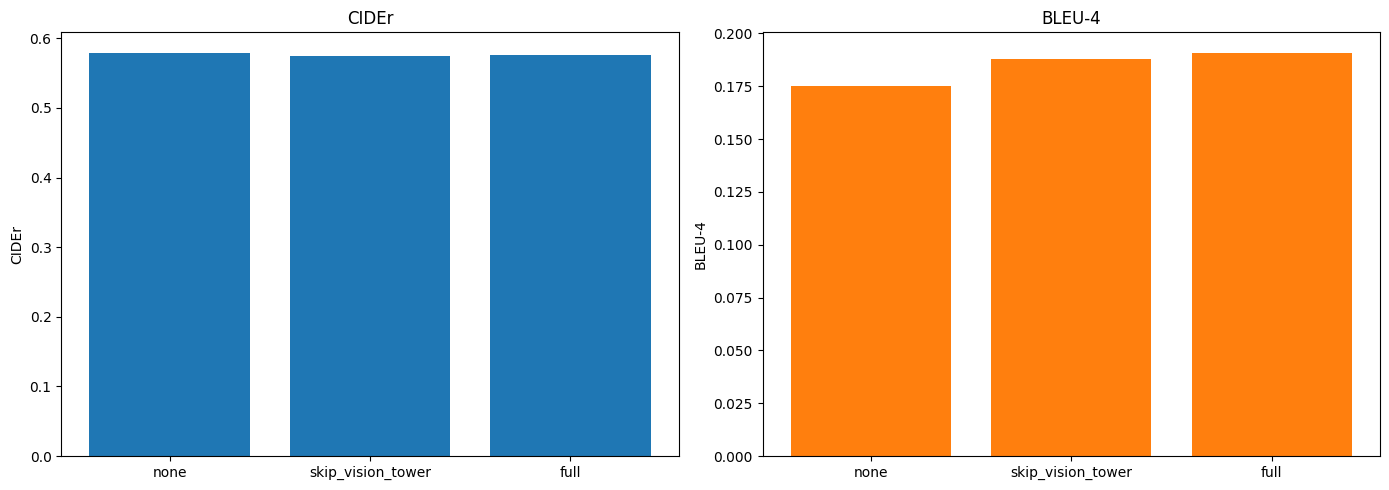

In [5]:
plot_eval_summary(results)

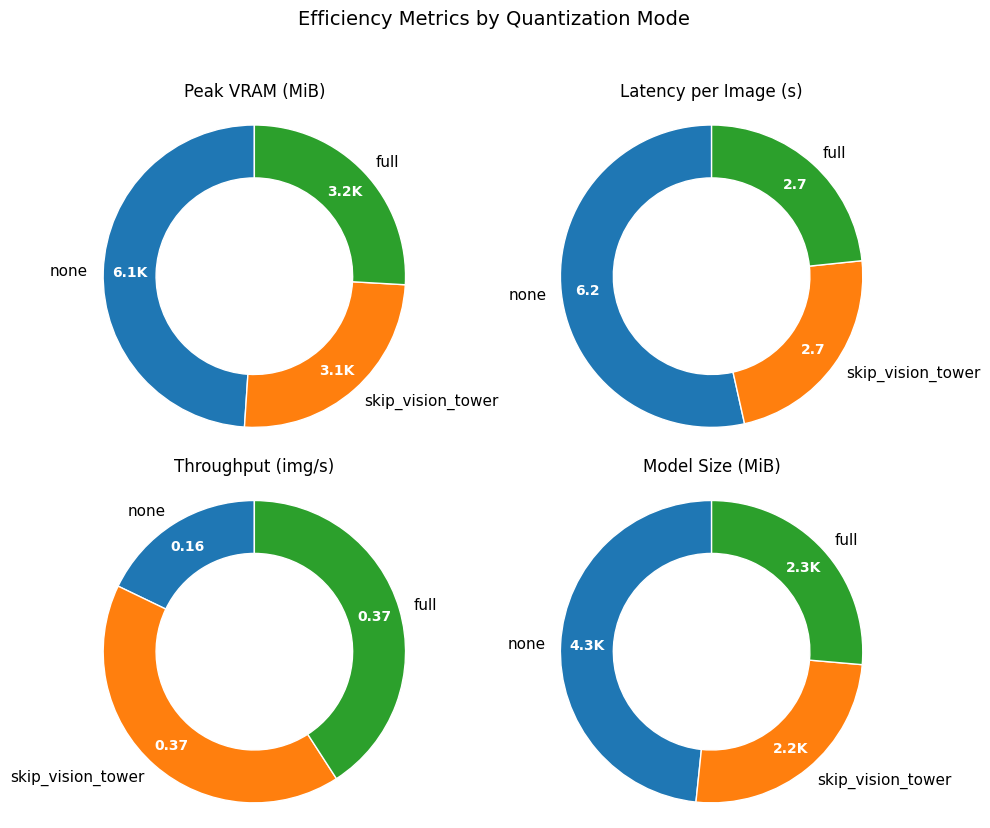

In [6]:
plot_efficiency_pies(metrics)

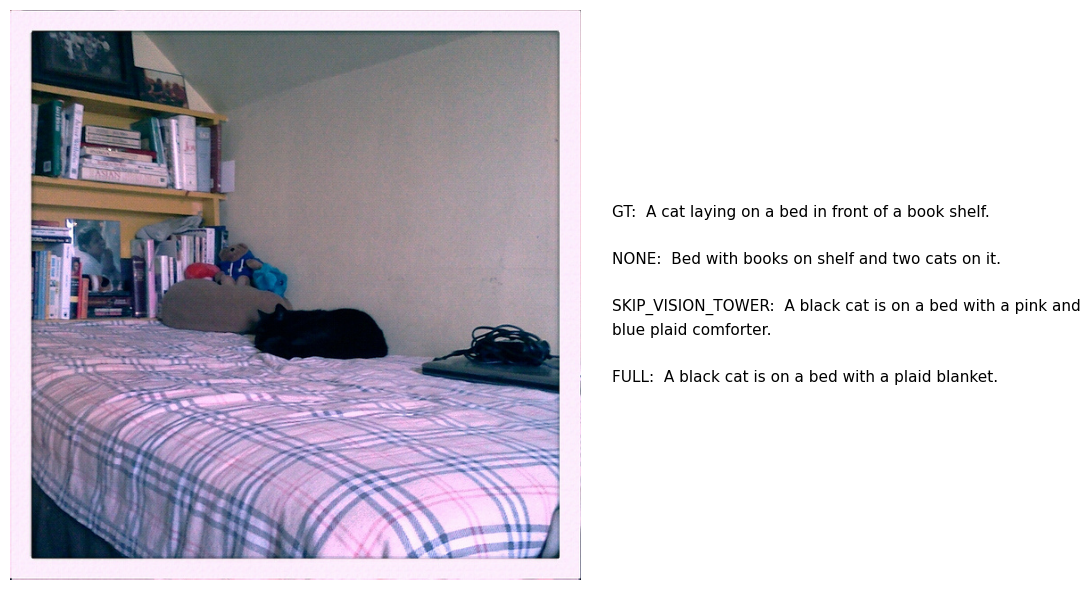

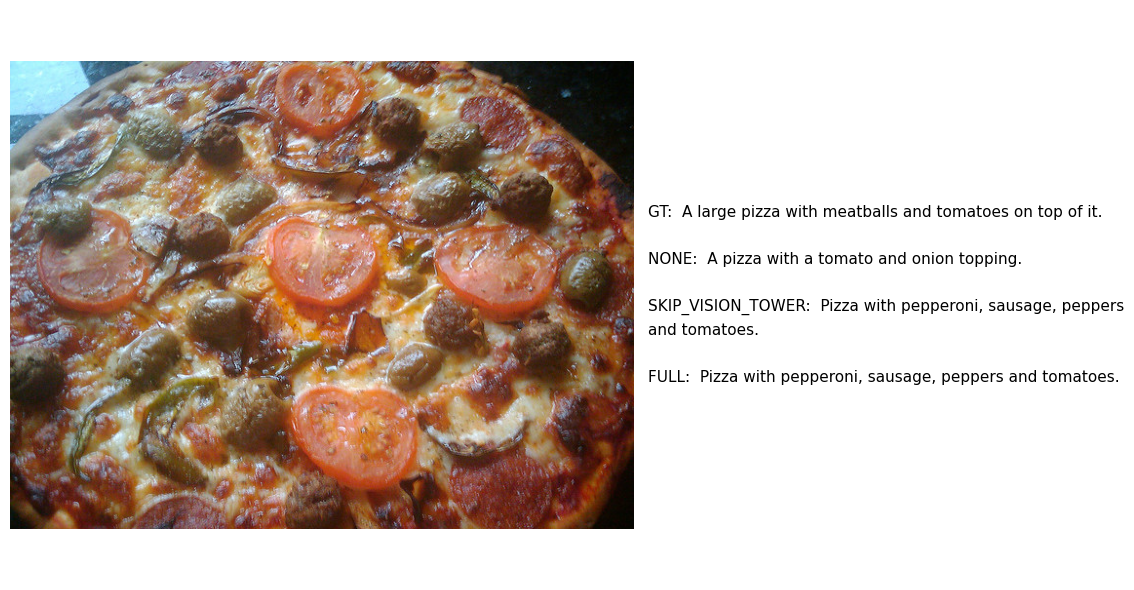

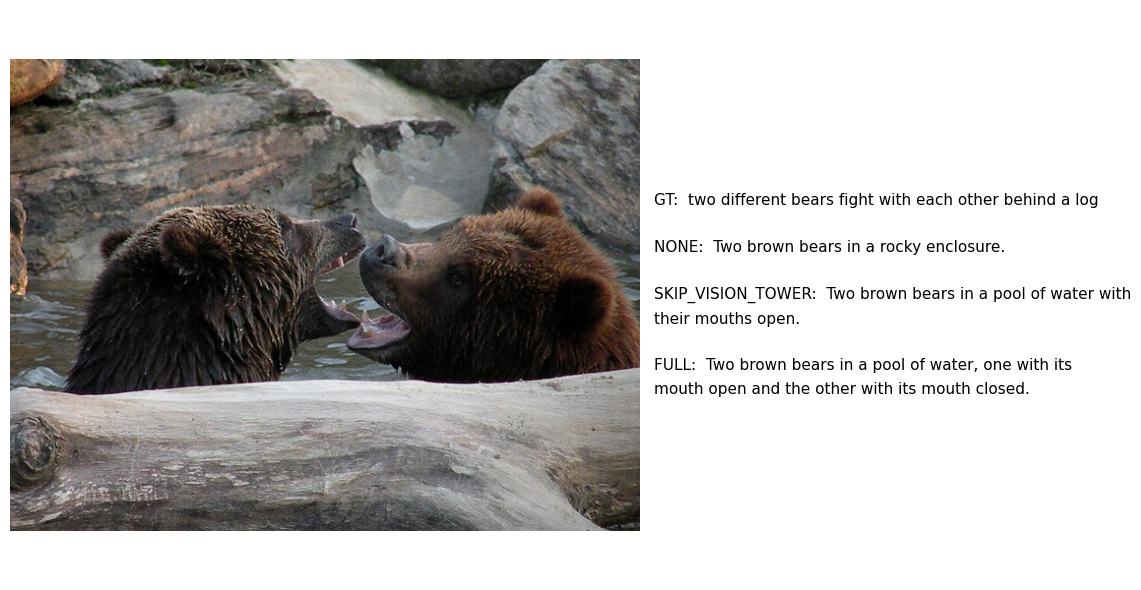

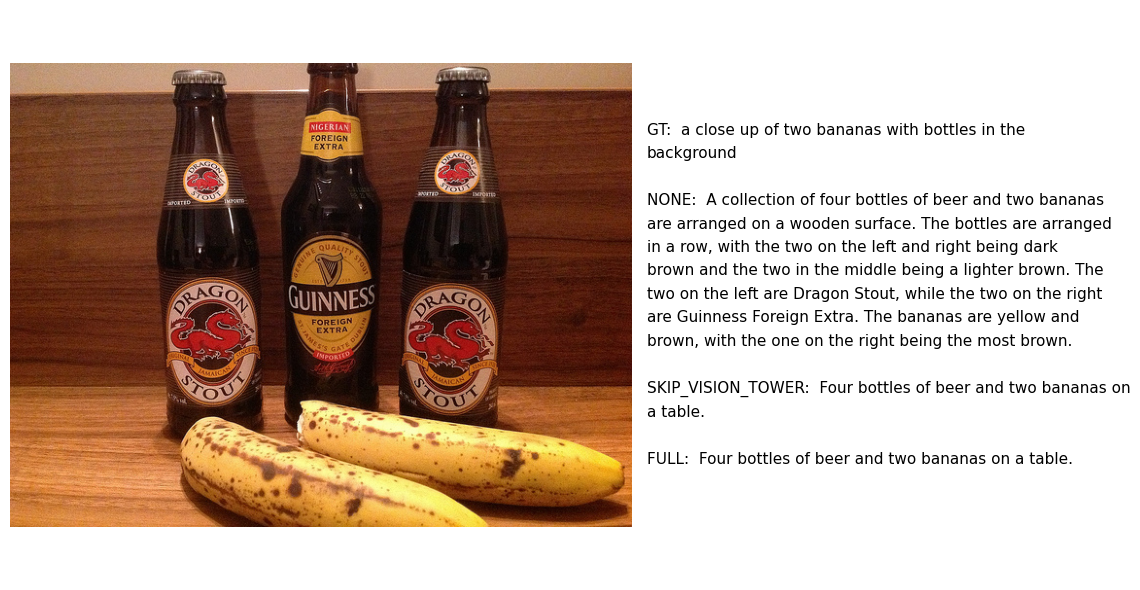

In [11]:
show_example_captions(num_examples=4, seed=3)